# Videoaula: Redes neurais e árvores de decisão

**Sumário**

> Código básico no Colab.
> Mecanismo de árvore de decisão.
> Profundidade da árvore - max_depth.
> Visualizando a árvore de decisão.
> Qual a profundidade ideal?

**Árvores de decisão**
> É um diagrama que mostra as interações entre as decisões e os eventos associados a ela, como são entendidas pelo tomador de decisão.

**LINK**
https://colab.research.google.com/drive/1hCtlTwM2sdqgZ6zz8r3mPLWBNG92eZ2e?usp=sharing

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
data = pd.read_csv(r"D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Mineração de Dados\Data_Mining\Unidade_II\Aula_II\california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [70]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
X = data.drop("median_house_value", axis=1)
y = data['median_house_value']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0)

#arvere = DecisionTreeRegressor(max_depth=8, random_state=0)
arvere = DecisionTreeRegressor(min_samples_leaf=2, random_state=0,max_depth=2)
arvere.fit(Xtr, ytr)

p = arvere.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

86143.9160569026

[Text(0.5, 0.8333333333333334, 'median_income <= 5.02\nsquared_error = 13557558368.64\nsamples = 8500\nvalue = 207877.802'),
 Text(0.25, 0.5, 'median_income <= 2.832\nsquared_error = 8408672354.196\nsamples = 6650\nvalue = 173230.209'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 5232614885.519\nsamples = 2683\nvalue = 128413.198'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8279521231.512\nsamples = 3967\nvalue = 203541.285'),
 Text(0.75, 0.5, 'median_income <= 6.829\nsquared_error = 12239344139.08\nsamples = 1850\nvalue = 332421.852'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8808047041.751\nsamples = 1275\nvalue = 291458.88'),
 Text(0.875, 0.16666666666666666, 'squared_error = 7876907783.956\nsamples = 575\nvalue = 423252.791')]

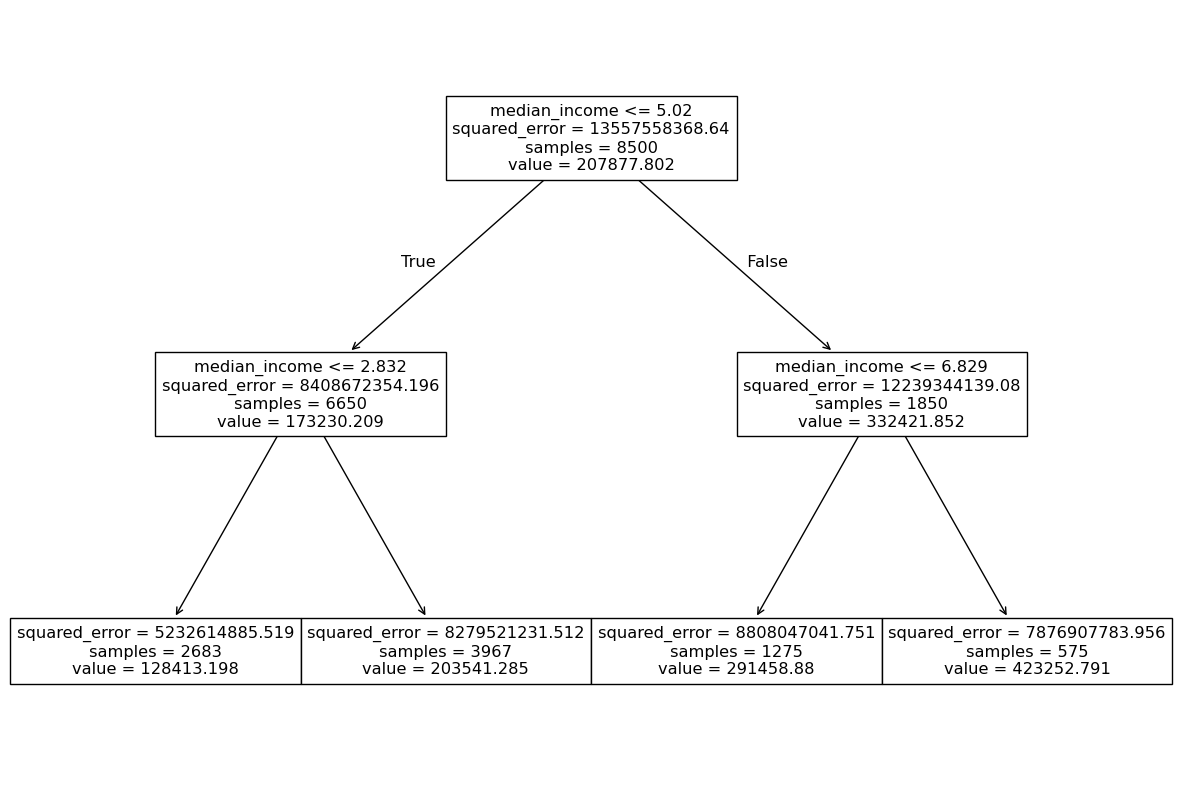

In [72]:
plt.figure(figsize=(15,10))
plot_tree(arvere, feature_names=Xtr.columns)

In [73]:
#Desempenho da média com base na profundidade da árvore.
"""None -> 72989.69335218017
d=2 -> 86143.9160569026
d=3 -> 82578.03051734
d=5 -> 75522.06075662695
d=8 -> 67186.75336427016
d=13 -> 70054.24656309857

msl=2 -> 69979.56423380405
msl=3 -> 67128.79409752366
msl=5 -> 64806.713441809865
msl=8 -> 63235.123980199794
msl=13 -> 62397.768886418744
msl=21 -> 62294.23381162341
msl=34 -> 63399.61797450719"""

'None -> 72989.69335218017\nd=2 -> 86143.9160569026\nd=3 -> 82578.03051734\nd=5 -> 75522.06075662695\nd=8 -> 67186.75336427016\nd=13 -> 70054.24656309857\n\nmsl=2 -> 69979.56423380405\nmsl=3 -> 67128.79409752366\nmsl=5 -> 64806.713441809865\nmsl=8 -> 63235.123980199794\nmsl=13 -> 62397.768886418744\nmsl=21 -> 62294.23381162341\nmsl=34 -> 63399.61797450719'

# Videoaula: Regras de associação e raciocínio baseado em casos

**Regras de Associação**
> É com o algoritmo Apriori que na mineração de conjuntos de itens frequentes e aprendizado de regras de associação em bancos de dados relacionais qie você irá encontrar os relacionamentos mais fortes.
>
> Os conjuntos de itens frequentes determinados por Apriori podem ser usados para determinar regras de associação que destacam tendências gerais no banco de dados: isso tem aplicações em domínios como análise de cesta de compras.

**LINK**
> https://colab.research.google.com/drive/1VpzPDuBk-Hh-z7LsvOqxKaRL8EzApd3z?usp=sharing

In [74]:
import numpy as np
import pandas as pd

In [75]:
#df = pd.read_csv("/content/drive/MyDrive/2022/Conteudista_Kroton/Data_Mining/compras4.csv", header=None)
df = pd.read_excel(r"D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Mineração de Dados\Data_Mining\Unidade_II\Aula_II\vendas-orangeshop.xlsx")
df.replace(np.nan, 0, inplace = True)
df.replace("?", 0, inplace = True)

C:\Users\Nayan Couto\AppData\Local\Temp\ipykernel_20760\2878715581.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", 0, inplace = True)


In [76]:
df.head()

,GELADEIRA,FOGAO,BICICLETA,RADIO,TV,RELOGIO,SMATPHONE,BARBEADOR,MAQUINA_DE_LAVAR,CHURRASQUEIRA_ELETRICA
0,1,1,1,1,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,1,1,1,0,1,0,1,0,0
3,0,1,0,0,1,1,1,0,0,0
4,0,1,0,0,1,1,1,0,0,0


def removeAllOcurrencesOfValueInList(_list, value):
    return list(filter(lambda x: x != value, _list))

list_all_transactions = []

for index, row in df.iterrows():
    list_single_transaction = row.values.tolist()
    list_single_transaction = removeAllOcurrencesOfValueInList(list_single_transaction, 0)
    list_all_transactions.append(list_single_transaction)

#10 primeiras transações
print(list_all_transactions[0:10])

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
#http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
te_ary = te.fit(list_all_transactions).transform(list_all_transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()

In [77]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True)
frequent_itemsets.sort_values(by=['support'], ascending = False).head(10)

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.652985,(RELOGIO)
4,0.626866,(TV)
3,0.582090,(RADIO)
40,0.425373,"(TV, RELOGIO)"
2,0.406716,(BICICLETA)
35,0.380597,"(RADIO, RELOGIO)"
34,0.380597,"(TV, RADIO)"
1,0.291045,(FOGAO)
29,0.287313,"(BICICLETA, RELOGIO)"
6,0.276119,(SMATPHONE)


In [78]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules.sort_values(by=['lift'], ascending = False).drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1)

,antecedents,consequents,support,confidence,lift,zhangs_metric
1386,"(RADIO, CHURRASQUEIRA_ELETRICA, TV, RELOGIO)","(FOGAO, BARBEADOR)",0.014925,0.363636,6.090909,0.871595
1389,"(RADIO, FOGAO, BARBEADOR)","(CHURRASQUEIRA_ELETRICA, TV, RELOGIO)",0.014925,0.363636,6.090909,0.871595
1390,"(FOGAO, BARBEADOR, RELOGIO)","(RADIO, CHURRASQUEIRA_ELETRICA, TV)",0.014925,0.333333,5.583333,0.859375
1387,"(TV, FOGAO, BARBEADOR)","(CHURRASQUEIRA_ELETRICA, RADIO, RELOGIO)",0.014925,0.333333,5.583333,0.859375
1304,"(SMATPHONE, RADIO, FOGAO, TV)","(BICICLETA, CHURRASQUEIRA_ELETRICA)",0.011194,0.333333,5.583333,0.849421
...,...,...,...,...,...,...
760,"(MAQUINA_DE_LAVAR, RADIO, SMATPHONE)",(RELOGIO),0.011194,0.375000,0.574286,-0.433140
750,"(MAQUINA_DE_LAVAR, TV, BARBEADOR)",(RADIO),0.011194,0.333333,0.572650,-0.435730
249,"(MAQUINA_DE_LAVAR, BARBEADOR)",(RADIO),0.018657,0.333333,0.572650,-0.441501
648,"(BICICLETA, MAQUINA_DE_LAVAR, RELOGIO)",(RADIO),0.011194,0.300000,0.515385,-0.494118


# Videoaula: Algoritmos genéticos e lógica fuzzy

**Lógica Fuzzy**

> Em um cruzamento encontrar uma aplicação que possa auxiliar no controle dos tempos dos semáforos.
> 
> Aplicação do raciocínio fuzzy, em três etapas:
>> Fuzzificação.
>>
>> Inferência Fuzzy.
>>
>> Defuzificação.

**Link**
> https://colab.research.google.com/drive/12HSbmiz07ZUysTx0XkbmiMYe7vNTv0fl?usp=sharing

In [79]:
!pip install scikit-fuzzy

In [80]:
#Importar as bibliotecas básicas
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#Importar as bibliotecas fuzzy
import skfuzzy as fuzz
from skfuzzy import control

In [82]:
np.arange(0,21,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [83]:
dominio_fila = np.arange(0,21,1)
dominio_ext = np.arange(0,21,1)

In [84]:
f1 = control.Antecedent(dominio_fila, 'f1')
f2 = control.Antecedent(dominio_fila, 'f2')
f3 = control.Antecedent(dominio_fila, 'f3')
f4 = control.Antecedent(dominio_fila, 'f4')

In [85]:
ext = control.Consequent(dominio_ext, 'ext')

In [86]:
f1['pequeno'] = fuzz.trimf(f1.universe,[0,4,8])
f1['media'] = fuzz.trimf(f1.universe,[4,8,12])
f1['longa'] = fuzz.trapmf(f1.universe,[8,12,20,20])

In [87]:
f2['pequeno'] = fuzz.trimf(f2.universe,[0,4,8])
f2['media'] = fuzz.trimf(f2.universe,[4,8,12])
f2['longa'] = fuzz.trapmf(f2.universe,[8,12,20,20])

In [88]:
f3['pequeno'] = fuzz.trimf(f3.universe,[0,4,8])
f3['media'] = fuzz.trimf(f3.universe,[4,8,12])
f3['longa'] = fuzz.trapmf(f3.universe,[8,12,20,20])

In [89]:
f4['pequeno'] = fuzz.trimf(f4.universe,[0,4,8])
f4['media'] = fuzz.trimf(f4.universe,[4,8,12])
f4['longa'] = fuzz.trapmf(f4.universe,[8,12,20,20])

In [90]:
ext['zero'] = fuzz.trimf(ext.universe,[0,0,5])
ext['curto'] = fuzz.trimf(ext.universe,[0,5,10])
ext['medio'] = fuzz.trimf(ext.universe,[5,10,15])
ext['longa'] = fuzz.trapmf(ext.universe,[10,15,20,20])

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


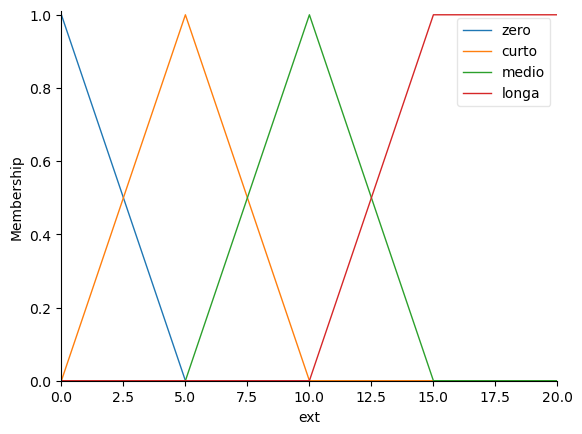

In [91]:
ext.view()

In [92]:
r1 = control.Rule(f1['longa'] & f2['pequeno'],ext['longa'])
r2 = control.Rule(f3['media'] | f4['pequeno'],ext['medio'])
r3 = control.Rule(f2['longa'] & f1['pequeno'],ext['zero'])

In [93]:
semaforo_controle = control.ControlSystem([r1,r2,r3])

In [94]:
sA = control.ControlSystemSimulation(semaforo_controle)

In [95]:
sA.input['f1'] = 10
sA.input['f2'] = 3
sA.input['f3'] = 0
sA.input['f4'] = 1

In [96]:
sA.compute()

In [97]:
sA.output

OrderedDict([('ext', 13.926818014027317)])

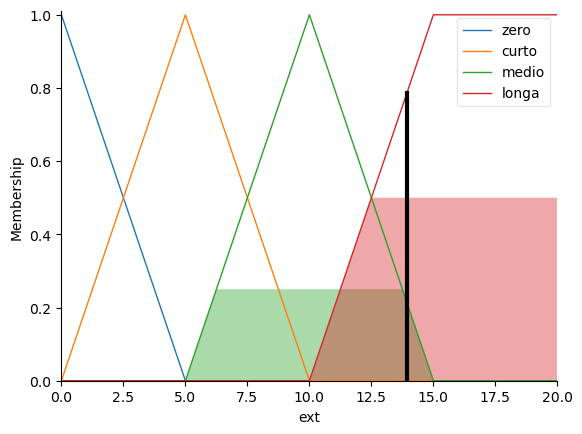

In [98]:
ext.view(sim=sA)